## First project for DESI collaboration.
In this small project we analyze data from DR9d file. (Version 3)
Working with file of omar and Co.

In [1]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import fitsio
#import desitarget.mtl
from astropy.io import fits
from astropy.table import Table, Column, vstack
import json
import shutil
import healpy


#from desitarget.targetmask import desi_mask, bgs_mask, mws_mask, obsconditions
from collections import Counter
import subprocess

%matplotlib inline

In [2]:
targets_filename = "dr9d_sweep_whole_r21.0_v2.0.npy"
targets = np.load(targets_filename)

In [3]:
#define data
def data(data,cut):
    if cut=="SV":
        data_any=data[data["BGSBITS"]&2**(30)!=0]
        data_faint=data[data["BGSBITS"]&2**(32)!=0]
        data_bright=data[data["BGSBITS"]&2**(31)!=0]
    if cut=="BGS":
        data_any=data[data["BGSBITS"]&2**(20)!=0]
        data_faint=data[data["BGSBITS"]&2**(22)!=0]
        data_bright=data[data["BGSBITS"]&2**(21)!=0]
    return data_any, data_bright, data_faint
targets=data(targets,"SV")[0]#targets[targets["BGSBITS"]&2**(30)!=0]
targets_bright=data(targets,"SV")[1]#targets[targets["BGSBITS"]&2**(32)!=0]
targets_faint=data(targets,"SV")[2]#targets[targets["BGSBITS"]&2**(31)!=0]
len(targets), len(targets_bright), len(targets_faint), len(targets_bright)+len(targets_faint)

(3590166, 619700, 551937, 1171637)

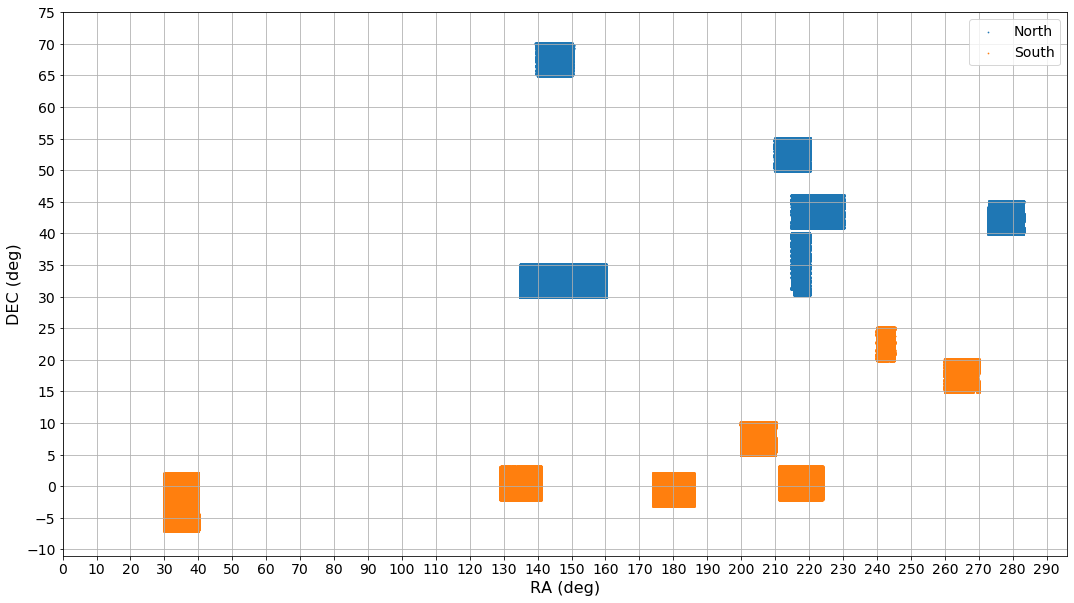

In [4]:
plt.figure(figsize=(18,10))
targets_north=targets[targets['DEC']>29]
targets_south=targets[targets['DEC']<29]
plt.scatter(targets_north['RA'], targets_north['DEC'], s=0.5, label="North")
plt.scatter(targets_south['RA'], targets_south['DEC'], s=0.5, label="South")
plt.xlabel("RA (deg)",fontsize=16)
plt.ylabel("DEC (deg)",fontsize=16)
plt.legend(fontsize=14)
plt.xticks(np.arange(0,300,10),fontsize=14)
plt.yticks(np.arange(-10,80,5),fontsize=14)
plt.grid()
plt.show()

In [5]:
#Defining zones
#SOUTH zones
s1=targets[(targets["RA"]>15)&(targets["RA"]<45)&(targets["DEC"]>-10)&(targets["DEC"]<5)]
s2=targets[(targets["RA"]>125)&(targets["RA"]<145)&(targets["DEC"]>-5)&(targets["DEC"]<5)]
s3=targets[(targets["RA"]>170)&(targets["RA"]<190)&(targets["DEC"]>-5)&(targets["DEC"]<5)]
s4=targets[(targets["RA"]>210)&(targets["RA"]<230)&(targets["DEC"]>-5)&(targets["DEC"]<4)]
s5=targets[(targets["RA"]>195)&(targets["RA"]<215)&(targets["DEC"]>4)&(targets["DEC"]<12)]
s6=targets[(targets["RA"]>255)&(targets["RA"]<275)&(targets["DEC"]>13)&(targets["DEC"]<23)]
s7=targets[(targets["RA"]>235)&(targets["RA"]<250)&(targets["DEC"]>17)&(targets["DEC"]<27)]
#NORTH zones
n1=targets[(targets["RA"]>130)&(targets["RA"]<165)&(targets["DEC"]>27)&(targets["DEC"]<37)]
n2=targets[(targets["RA"]>210)&(targets["RA"]<225)&(targets["DEC"]>30)&(targets["DEC"]<40.5)]
n3=targets[(targets["RA"]>210)&(targets["RA"]<235)&(targets["DEC"]>40.5)&(targets["DEC"]<48)]
n4=targets[(targets["RA"]>270)&(targets["RA"]<290)&(targets["DEC"]>35)&(targets["DEC"]<50)]
n5=targets[(targets["RA"]>205)&(targets["RA"]<225)&(targets["DEC"]>47)&(targets["DEC"]<60)]
n6=targets[(targets["RA"]>135)&(targets["RA"]<155)&(targets["DEC"]>60)&(targets["DEC"]<80)]

In [6]:
#Verifing that zones are corrects and represent all data
print("Total objects count =",len(targets))
print("===========================================================")
print("Total objects counts for s1 =",len(s1))
print("Total objects counts for s2 =",len(s2))
print("Total objects counts for s3 =",len(s3))
print("Total objects counts for s4 =",len(s4))
print("Total objects counts for s5 =",len(s5))
print("Total objects counts for s6 =",len(s6))
print("Total objects counts for s7 =",len(s7))
print("===========================================================")
print("Total objects count in SOUTH zones=",len(s1)+len(s2)+len(s3)+len(s4)+len(s5)+len(s6)+len(s7))
print("===========================================================")
print("Total objects counts for n1 =",len(n1))
print("Total objects counts for n2 =",len(n2))
print("Total objects counts for n3 =",len(n3))
print("Total objects counts for n4 =",len(n4))
print("Total objects counts for n5 =",len(n5))
print("Total objects counts for n6 =",len(n6))
print("===========================================================")
print("Total objects count in NORTH zones=",len(n1)+len(n2)+len(n3)+len(n4)+len(n5)+len(n6))
print("===========================================================")
print("Total objects count in SOUTH and NORTH zones=",len(s1)+len(s2)+len(s3)+len(s4)+len(s5)+len(s6)+
      len(s7)+len(n1)+len(n2)+len(n3)+len(n4)+len(n5)+len(n6))
print("===========================================================")

Total objects count = 3590166
Total objects counts for s1 = 399964
Total objects counts for s2 = 272630
Total objects counts for s3 = 268971
Total objects counts for s4 = 299888
Total objects counts for s5 = 218791
Total objects counts for s6 = 258115
Total objects counts for s7 = 104160
Total objects count in SOUTH zones= 1822519
Total objects counts for n1 = 874170
Total objects counts for n2 = 175692
Total objects counts for n3 = 247913
Total objects counts for n4 = 230478
Total objects counts for n5 = 142487
Total objects counts for n6 = 96907
Total objects count in NORTH zones= 1767647
Total objects count in SOUTH and NORTH zones= 3590166


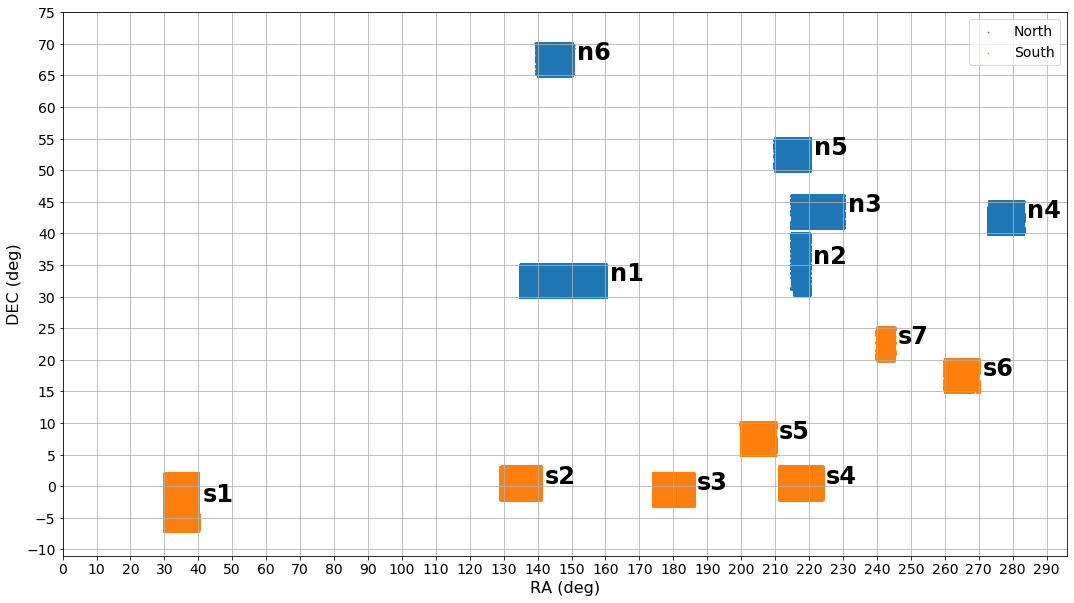

In [7]:
plt.figure(figsize=(18,10))
targets_north=targets[targets['DEC']>29]
targets_south=targets[targets['DEC']<29]
plt.scatter(targets_north['RA'], targets_north['DEC'], s=0.5, label="North")
plt.scatter(targets_south['RA'], targets_south['DEC'], s=0.5, label="South")
plt.xlabel("RA (deg)",fontsize=16)
plt.ylabel("DEC (deg)",fontsize=16)
plt.legend(fontsize=14)
plt.xticks(np.arange(0,300,10),fontsize=14)
plt.yticks(np.arange(-10,80,5),fontsize=14)
plt.text((s1["RA"].max())+1,(s1["DEC"].max()+s1["DEC"].min())/2,"s1",fontsize=24,fontweight='bold')
plt.text((s2["RA"].max())+1,(s2["DEC"].max()+s2["DEC"].min())/2,"s2",fontsize=24,fontweight='bold')
plt.text((s3["RA"].max())+1,(s3["DEC"].max()+s3["DEC"].min())/2,"s3",fontsize=24,fontweight='bold')
plt.text((s4["RA"].max())+1,(s4["DEC"].max()+s4["DEC"].min())/2,"s4",fontsize=24,fontweight='bold')
plt.text((s5["RA"].max())+1,(s5["DEC"].max()+s5["DEC"].min())/2,"s5",fontsize=24,fontweight='bold')
plt.text((s6["RA"].max())+1,(s6["DEC"].max()+s6["DEC"].min())/2,"s6",fontsize=24,fontweight='bold')
plt.text((s7["RA"].max())+1,(s7["DEC"].max()+s7["DEC"].min())/2,"s7",fontsize=24,fontweight='bold')
plt.text((n1["RA"].max())+1,(n1["DEC"].max()+n1["DEC"].min())/2,"n1",fontsize=24,fontweight='bold')
plt.text((n2["RA"].max())+1,(n2["DEC"].max()+n2["DEC"].min())/2,"n2",fontsize=24,fontweight='bold')
plt.text((n3["RA"].max())+1,(n3["DEC"].max()+n3["DEC"].min())/2,"n3",fontsize=24,fontweight='bold')
plt.text((n4["RA"].max())+1,(n4["DEC"].max()+n4["DEC"].min())/2,"n4",fontsize=24,fontweight='bold')
plt.text((n5["RA"].max())+1,(n5["DEC"].max()+n5["DEC"].min())/2,"n5",fontsize=24,fontweight='bold')
plt.text((n6["RA"].max())+1,(n6["DEC"].max()+n6["DEC"].min())/2,"n6",fontsize=24,fontweight='bold')
plt.grid()
plt.show()

## Some definitions

In [8]:
#Make scatter for zone
def make_scatter(data,zone,number,cut):
    plt.figure(figsize=(10,6))
    if cut=="SV":
        data_faint=data[data["BGSBITS"]&2**(32)!=0]
        data_bright=data[data["BGSBITS"]&2**(31)!=0]
    if cut=="BGS":
        data_faint=data[data["BGSBITS"]&2**(22)!=0]
        data_bright=data[data["BGSBITS"]&2**(21)!=0]
    plt.scatter(data['RA'], data['DEC'], s=0.5, label=str(zone)+str(number))
    plt.scatter(data_faint['RA'], data_faint['DEC'], s=0.5, label="Faint")
    plt.scatter(data_bright['RA'], data_bright['DEC'], s=0.5, label="Bright")
    plt.text((data["RA"].min()+1),(data["DEC"].min()+1),"zone "+str(zone)+str(number),fontsize=22,fontweight='bold')
    plt.xlabel("RA (deg)",fontsize=14)
    plt.ylabel("DEC (deg)",fontsize=14)
    plt.legend(fontsize=14)
    plt.show()

In [9]:
def prepare_count(data,zone,number,cut):
    bold = "\033[1m"
    reset = "\033[0;0m"
    print(bold + "Counts and statistic for zone "+str(zone)+str(number) + reset)
    ramin,ramax,decmin,decmax=data['RA'].min(),data['RA'].max(),\
    data['DEC'].min(),data['DEC'].max()
    print("---------------------------------------------------------------------------")
    print("Data lenght =",len(data))
    print("---------------------------------------------------------------------------")
    print("Right Ascension Range Zone :","(",ramin,",",ramax,")")
    print("Declination Range Zone :","(",decmin,",",decmax,")")
    area=((np.radians(ramax)-np.radians(ramin))*\
    (np.sin(np.radians(decmax))-np.sin(np.radians(decmin))))*(180./np.pi)**2
    print("---------------------------------------------------------------------------")
    print("Covered area =",area)
    # BGS_FAINT
    if cut=="SV":
        data_faint=data[data["BGSBITS"]&2**(32)!=0]
        data_bright=data[data["BGSBITS"]&2**(31)!=0]
    if cut=="BGS":
        data_faint=data[data["BGSBITS"]&2**(22)!=0]
        data_bright=data[data["BGSBITS"]&2**(21)!=0]
    
    area_faint=((np.radians(data_faint["RA"].max())-np.radians(data_faint["RA"].min()))*\
                (np.sin(np.radians(data_faint["DEC"].max()))-np.sin(np.radians(data_faint["DEC"].min()))))*(180./np.pi)**2
    
    area_bright=((np.radians(data_bright["RA"].max())-np.radians(data_bright["RA"].min()))*\
                (np.sin(np.radians(data_bright["DEC"].max()))-np.sin(np.radians(data_bright["DEC"].min()))))*(180./np.pi)**2
    
    print("Covered Faint area =",area_faint)
    print("Covered Bright area =",area_bright)
    print("---------------------------------------------------------------------------")
    #print("N(BGS_FAINT_SOUTH)= ",len(data_65537))
    #print("N(BGS_FAINT_NORTH)= ",len(data_257))
    #print("N(BGS_FAINT_HIP_SOUTH)= ",len(data_65545))
    #print("N(BGS_FAINT_HIP_NORTH)= ",len(data_265))
    #print("N(BGS_BRIGHT_SOUTH)= ",len(data_131074))
    #print("N(BGS_BRIGHT_NORTH)= ",len(data_514))
    print("---------------------------------------------------------------------------")
    N_FAINT=len(data_faint)
    N_BRIGHT=len(data_bright)
    print("N(BGS_FAINT)= ",N_FAINT)
    print("N(BGS_BRIGHT)= ",N_BRIGHT)
    print("---------------------------------------------------------------------------")
    D_FAINT=np.round((len(data_faint))/area_faint)
    D_BRIGHT=np.round((len(data_bright))/area_bright)
    print("DENSITY(BGS_FAINT)= ",D_FAINT)
    print("DENSITY(BGS_BRIGHT)= ",D_BRIGHT)
    print("---------------------------------------------------------------------------")
    return area, N_FAINT, N_BRIGHT, D_FAINT, D_BRIGHT

## Counting

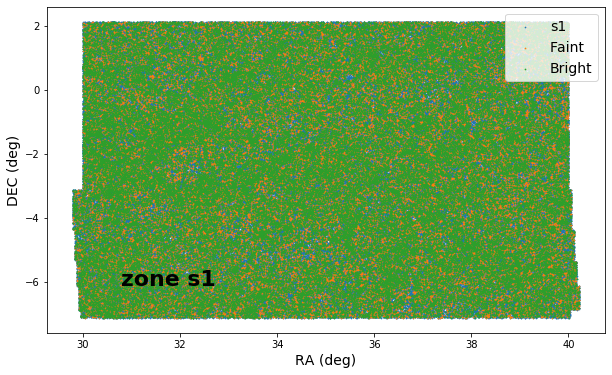

Counts and statistic for zone s1
---------------------------------------------------------------------------
Data lenght = 399964
---------------------------------------------------------------------------
Right Ascension Range Zone : ( 29.791383237542618 , 40.22310373031725 )
Declination Range Zone : ( -7.124991196421787 , 2.1249783261261035 )
---------------------------------------------------------------------------
Covered area = 96.29659982539856
Covered Faint area = 96.29064007229601
Covered Bright area = 96.27538415408254
---------------------------------------------------------------------------
---------------------------------------------------------------------------
N(BGS_FAINT)=  72773
N(BGS_BRIGHT)=  82744
---------------------------------------------------------------------------
DENSITY(BGS_FAINT)=  756.0
DENSITY(BGS_BRIGHT)=  859.0
---------------------------------------------------------------------------


(96.29659982539856, 72773, 82744, 756.0, 859.0)

In [10]:
make_scatter(s1,"s",1,"SV")
prepare_count(s1,"s",1,"SV")

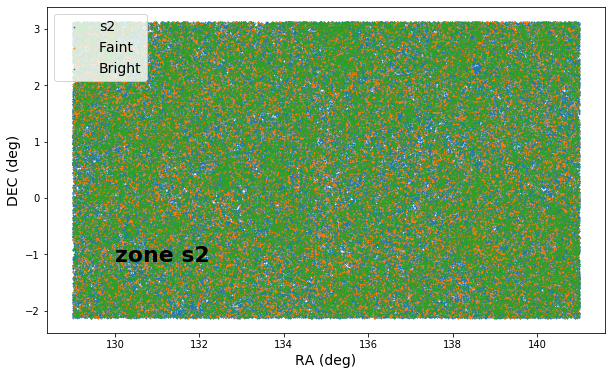

Counts and statistic for zone s2
---------------------------------------------------------------------------
Data lenght = 272630
---------------------------------------------------------------------------
Right Ascension Range Zone : ( 129.00005997996848 , 140.99976596031632 )
Declination Range Zone : ( -2.1249870585327377 , 3.1249780391930644 )
---------------------------------------------------------------------------
Covered area = 62.97360343596282
Covered Faint area = 62.970025308004466
Covered Bright area = 62.97271638229157
---------------------------------------------------------------------------
---------------------------------------------------------------------------
N(BGS_FAINT)=  48613
N(BGS_BRIGHT)=  52478
---------------------------------------------------------------------------
DENSITY(BGS_FAINT)=  772.0
DENSITY(BGS_BRIGHT)=  833.0
---------------------------------------------------------------------------


(62.97360343596282, 48613, 52478, 772.0, 833.0)

In [11]:
make_scatter(s2,"s",2,"SV")
prepare_count(s2,"s",2,"SV")

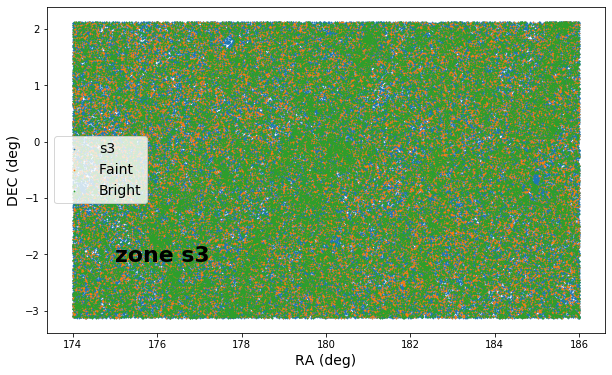

Counts and statistic for zone s3
---------------------------------------------------------------------------
Data lenght = 268971
---------------------------------------------------------------------------
Right Ascension Range Zone : ( 174.00010641398904 , 185.99998849320528 )
Declination Range Zone : ( -3.1249591687996516 , 2.124988745660166 )
---------------------------------------------------------------------------
Covered area = 62.97432171592831
Covered Faint area = 62.971501163057084
Covered Bright area = 62.96788564008984
---------------------------------------------------------------------------
---------------------------------------------------------------------------
N(BGS_FAINT)=  48610
N(BGS_BRIGHT)=  55753
---------------------------------------------------------------------------
DENSITY(BGS_FAINT)=  772.0
DENSITY(BGS_BRIGHT)=  885.0
---------------------------------------------------------------------------


(62.97432171592831, 48610, 55753, 772.0, 885.0)

In [12]:
make_scatter(s3,"s",3,"SV")
prepare_count(s3,"s",3,"SV")

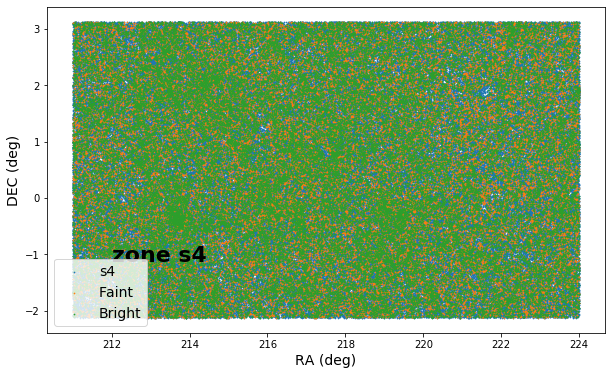

Counts and statistic for zone s4
---------------------------------------------------------------------------
Data lenght = 299888
---------------------------------------------------------------------------
Right Ascension Range Zone : ( 211.0000320391722 , 223.9999157768371 )
Declination Range Zone : ( -2.1249973885480165 , 3.1249961459073248 )
---------------------------------------------------------------------------
Covered area = 68.22283439471025
Covered Faint area = 68.2194657502049
Covered Bright area = 68.22041343931963
---------------------------------------------------------------------------
---------------------------------------------------------------------------
N(BGS_FAINT)=  51044
N(BGS_BRIGHT)=  58331
---------------------------------------------------------------------------
DENSITY(BGS_FAINT)=  748.0
DENSITY(BGS_BRIGHT)=  855.0
---------------------------------------------------------------------------


(68.22283439471025, 51044, 58331, 748.0, 855.0)

In [13]:
make_scatter(s4,"s",4,"SV")
prepare_count(s4,"s",4,"SV")

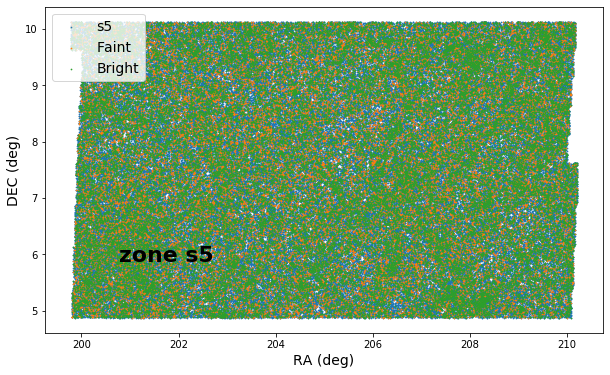

Counts and statistic for zone s5
---------------------------------------------------------------------------
Data lenght = 218791
---------------------------------------------------------------------------
Right Ascension Range Zone : ( 199.77523984955187 , 210.20964478990723 )
Declination Range Zone : ( 4.875002300123503 , 10.124986427677754 )
---------------------------------------------------------------------------
Covered area = 54.29280857726904
Covered Faint area = 54.2772343662884
Covered Bright area = 54.29194349034644
---------------------------------------------------------------------------
---------------------------------------------------------------------------
N(BGS_FAINT)=  38062
N(BGS_BRIGHT)=  45168
---------------------------------------------------------------------------
DENSITY(BGS_FAINT)=  701.0
DENSITY(BGS_BRIGHT)=  832.0
---------------------------------------------------------------------------


(54.29280857726904, 38062, 45168, 701.0, 832.0)

In [14]:
make_scatter(s5,"s",5,"SV")
prepare_count(s5,"s",5,"SV")

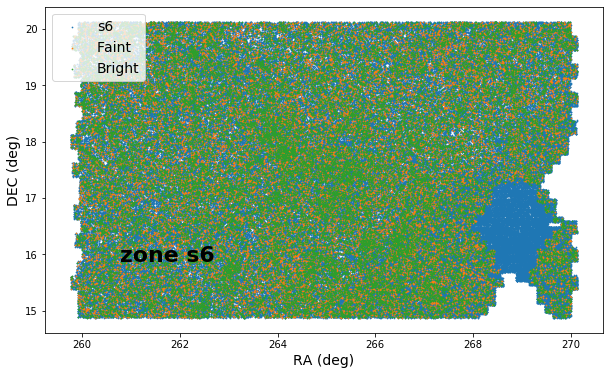

Counts and statistic for zone s6
---------------------------------------------------------------------------
Data lenght = 258115
---------------------------------------------------------------------------
Right Ascension Range Zone : ( 259.76679827487067 , 270.1324482191871 )
Declination Range Zone : ( 14.875022483929952 , 20.12499979970613 )
---------------------------------------------------------------------------
Covered area = 51.88257228525097
Covered Faint area = 51.88078844444204
Covered Bright area = 51.83995087115889
---------------------------------------------------------------------------
---------------------------------------------------------------------------
N(BGS_FAINT)=  32757
N(BGS_BRIGHT)=  37711
---------------------------------------------------------------------------
DENSITY(BGS_FAINT)=  631.0
DENSITY(BGS_BRIGHT)=  727.0
---------------------------------------------------------------------------


(51.88257228525097, 32757, 37711, 631.0, 727.0)

In [15]:
make_scatter(s6,"s",6,"SV")
prepare_count(s6,"s",6,"SV")

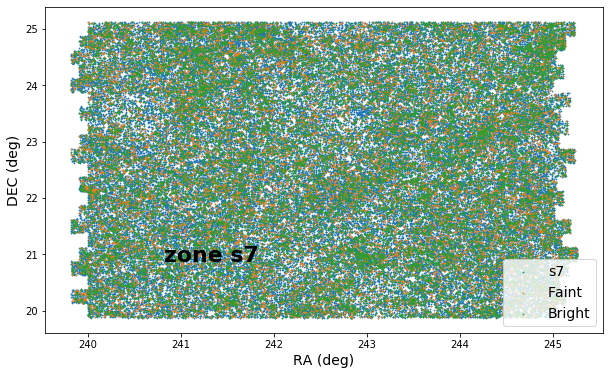

Counts and statistic for zone s7
---------------------------------------------------------------------------
Data lenght = 104160
---------------------------------------------------------------------------
Right Ascension Range Zone : ( 239.81733505056312 , 245.25983319981646 )
Declination Range Zone : ( 19.87508356964166 , 25.12497672136626 )
---------------------------------------------------------------------------
Covered area = 26.38833995628272
Covered Faint area = 26.36167231537072
Covered Bright area = 26.38161934047083
---------------------------------------------------------------------------
---------------------------------------------------------------------------
N(BGS_FAINT)=  18069
N(BGS_BRIGHT)=  21303
---------------------------------------------------------------------------
DENSITY(BGS_FAINT)=  685.0
DENSITY(BGS_BRIGHT)=  807.0
---------------------------------------------------------------------------


(26.38833995628272, 18069, 21303, 685.0, 807.0)

In [16]:
make_scatter(s7,"s",7,"SV")
prepare_count(s7,"s",7,"SV")

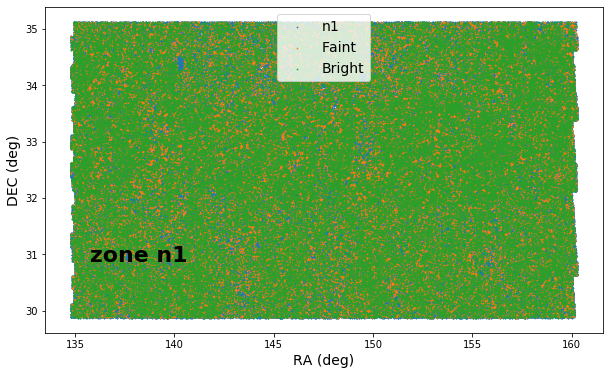

Counts and statistic for zone n1
---------------------------------------------------------------------------
Data lenght = 874170
---------------------------------------------------------------------------
Right Ascension Range Zone : ( 134.77384401208062 , 160.2692921163963 )
Declination Range Zone : ( 29.875000005363212 , 35.124988618253134 )
---------------------------------------------------------------------------
Covered area = 112.84914921282113
Covered Faint area = 112.82044239891695
Covered Bright area = 112.80750456100718
---------------------------------------------------------------------------
---------------------------------------------------------------------------
N(BGS_FAINT)=  113103
N(BGS_BRIGHT)=  123722
---------------------------------------------------------------------------
DENSITY(BGS_FAINT)=  1003.0
DENSITY(BGS_BRIGHT)=  1097.0
---------------------------------------------------------------------------


(112.84914921282113, 113103, 123722, 1003.0, 1097.0)

In [17]:
make_scatter(n1,"n",1,"SV")
prepare_count(n1,"n",1,"SV")

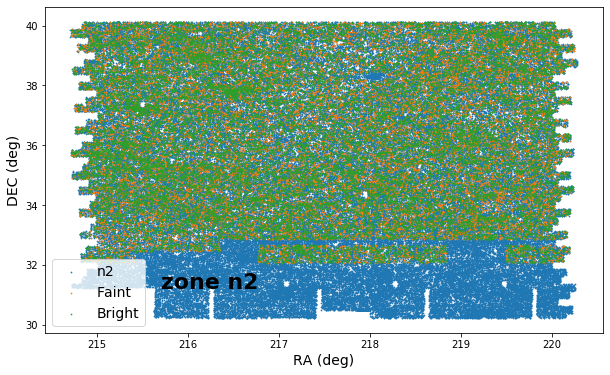

Counts and statistic for zone n2
---------------------------------------------------------------------------
Data lenght = 175692
---------------------------------------------------------------------------
Right Ascension Range Zone : ( 214.7027494798517 , 220.28370360438376 )
Declination Range Zone : ( 30.227903028666063 , 40.12498185813979 )
---------------------------------------------------------------------------
Covered area = 45.092092930416285
Covered Faint area = 36.063913729177976
Covered Bright area = 36.100726422113574
---------------------------------------------------------------------------
---------------------------------------------------------------------------
N(BGS_FAINT)=  23018
N(BGS_BRIGHT)=  26226
---------------------------------------------------------------------------
DENSITY(BGS_FAINT)=  638.0
DENSITY(BGS_BRIGHT)=  726.0
---------------------------------------------------------------------------


(45.092092930416285, 23018, 26226, 638.0, 726.0)

In [18]:
make_scatter(n2,"n",2,"SV")
prepare_count(n2,"n",2,"SV")

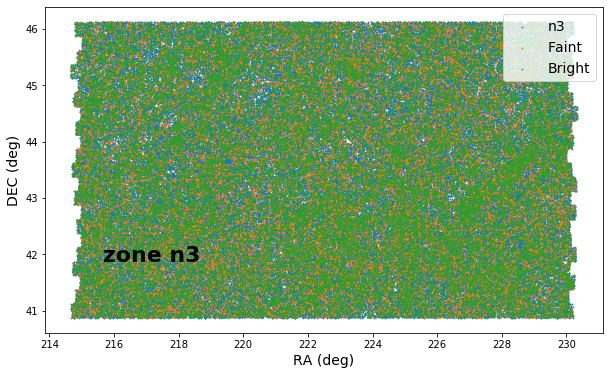

Counts and statistic for zone n3
---------------------------------------------------------------------------
Data lenght = 247913
---------------------------------------------------------------------------
Right Ascension Range Zone : ( 214.6584196533241 , 230.32933973906992 )
Declination Range Zone : ( 40.87503216199508 , 46.12493289625645 )
---------------------------------------------------------------------------
Covered area = 59.65625472598769
Covered Faint area = 59.64729241599668
Covered Bright area = 59.64269838587122
---------------------------------------------------------------------------
---------------------------------------------------------------------------
N(BGS_FAINT)=  42391
N(BGS_BRIGHT)=  46635
---------------------------------------------------------------------------
DENSITY(BGS_FAINT)=  711.0
DENSITY(BGS_BRIGHT)=  782.0
---------------------------------------------------------------------------


(59.65625472598769, 42391, 46635, 711.0, 782.0)

In [19]:
make_scatter(n3,"n",3,"SV")
prepare_count(n3,"n",3,"SV")

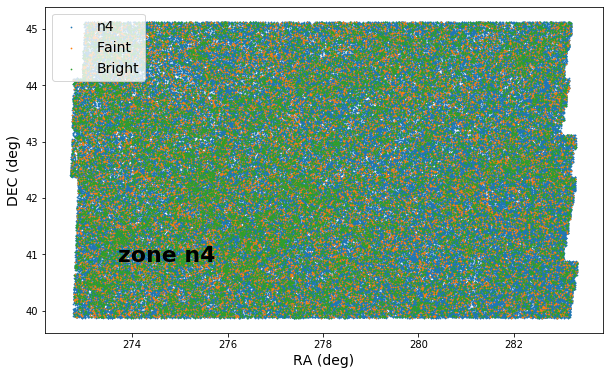

Counts and statistic for zone n4
---------------------------------------------------------------------------
Data lenght = 230478
---------------------------------------------------------------------------
Right Ascension Range Zone : ( 272.70743829467136 , 283.32680410926866 )
Declination Range Zone : ( 39.87501553463676 , 45.12493976113341 )
---------------------------------------------------------------------------
Covered area = 41.08948699175687
Covered Faint area = 41.05020493136095
Covered Bright area = 41.03784538296871
---------------------------------------------------------------------------
---------------------------------------------------------------------------
N(BGS_FAINT)=  25837
N(BGS_BRIGHT)=  28984
---------------------------------------------------------------------------
DENSITY(BGS_FAINT)=  629.0
DENSITY(BGS_BRIGHT)=  706.0
---------------------------------------------------------------------------


(41.08948699175687, 25837, 28984, 629.0, 706.0)

In [20]:
make_scatter(n4,"n",4,"SV")
prepare_count(n4,"n",4,"SV")

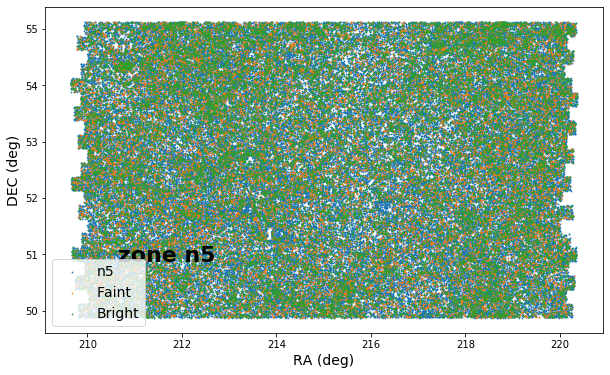

Counts and statistic for zone n5
---------------------------------------------------------------------------
Data lenght = 142487
---------------------------------------------------------------------------
Right Ascension Range Zone : ( 209.6480141267944 , 220.37125973156148 )
Declination Range Zone : ( 49.87509768192235 , 55.12499213418994 )
---------------------------------------------------------------------------
Covered area = 34.25875482526128
Covered Faint area = 34.176189769146525
Covered Bright area = 34.23998272919563
---------------------------------------------------------------------------
---------------------------------------------------------------------------
N(BGS_FAINT)=  23153
N(BGS_BRIGHT)=  25063
---------------------------------------------------------------------------
DENSITY(BGS_FAINT)=  677.0
DENSITY(BGS_BRIGHT)=  732.0
---------------------------------------------------------------------------


(34.25875482526128, 23153, 25063, 677.0, 732.0)

In [21]:
make_scatter(n5,"n",5,"SV")
prepare_count(n5,"n",5,"SV")

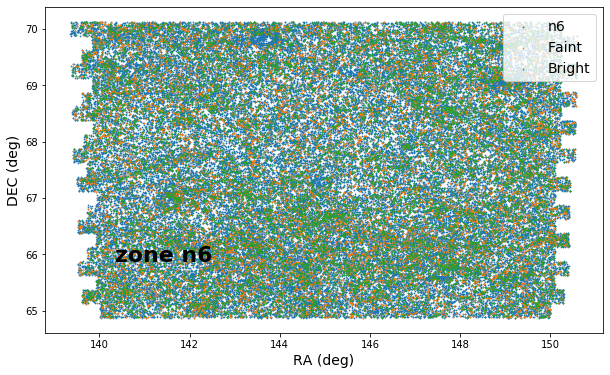

Counts and statistic for zone n6
---------------------------------------------------------------------------
Data lenght = 96907
---------------------------------------------------------------------------
Right Ascension Range Zone : ( 139.35670983587366 , 150.59398215476583 )
Declination Range Zone : ( 64.87505957127509 , 70.12493616131164 )
---------------------------------------------------------------------------
Covered area = 22.568243817064964
Covered Faint area = 22.46615067875248
Covered Bright area = 22.479386338662305
---------------------------------------------------------------------------
---------------------------------------------------------------------------
N(BGS_FAINT)=  14507
N(BGS_BRIGHT)=  15582
---------------------------------------------------------------------------
DENSITY(BGS_FAINT)=  646.0
DENSITY(BGS_BRIGHT)=  693.0
---------------------------------------------------------------------------


(22.568243817064964, 14507, 15582, 646.0, 693.0)

In [22]:
make_scatter(n6,"n",6,"SV")
prepare_count(n6,"n",6,"SV")